Configs

Region Codes:
"California Region (Hydrologic Unit)       -------18
"Pacific Northwest Region (Hydrologic Unit)-------17
"New England Region (Hydrologic Unit)      -------1
"Rio Grande Region (Hydrologic Unit)       -------13


In [1]:
import requests
import csv
import pandas as pd
import math
import matplotlib.pyplot as plt

# tmin, tmax, tavg
data_type = "tavg"

# this is the downloaded file name
filename = 'tempdata_avg.csv'    

# this is the cleaned data destination file for one region and measurement
destination_file = 'new_england_tavg.csv' 

start_year = 1951 # int
end_year = 2022   # minus one, end date wil be end of previous year

index_start = "1951-01-01" #str 
index_end = "2021-12-31"

header = ['Area','Area code','Area name','year','month',data_type, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

region_code = 1


First, download data from NOAA website

Now, divide the data into seperate files per region, remove the null values for non existent days

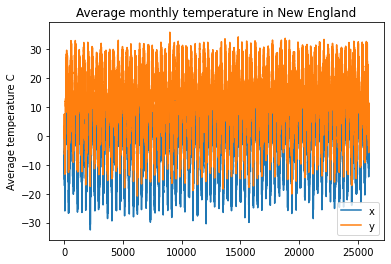

In [2]:



df1 = pd.read_csv("new_england_tmin.csv")
df2 = pd.read_csv("new_england_tmax.csv")

def printmetadata(dataframe):
    print(dataframe.head())
    print(dataframe.columns)
    print(dataframe.values)
    print(dataframe.shape)
    print(dataframe.dtypes)


x = df1.index
y = df1.iloc[:,1]
z = df2.iloc[:,1]



plt.plot(x, y, z)
plt.ylabel("Average temperature C")
plt.title("Average monthly temperature in New England")
plt.legend("xy")
plt.show()








In [3]:
df = pd.read_csv("new_england_tavg.csv")

import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm

register_matplotlib_converters()
sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)


In [4]:
measures = df.iloc[:,1]
myindex = df.iloc[:,0]
measures = measures.squeeze()
measures.index = myindex
measures.describe()

count    25933.000000
mean         6.298558
std         10.503297
min        -25.030000
25%         -1.740000
50%          6.890000
75%         15.510000
max         27.740000
Name: measurement, dtype: float64

In [ ]:
decomposition = sm.tsa.seasonal_decompose(measures, period = 365, 
model='additive')
fig = decomposition.plot()

In [ ]:
#  class statsmodels.tsa.seasonal.STL(endog, period=None, seasonal=7, trend=None, low_pass=None, seasonal_deg=1, 
# trend_deg=1, low_pass_deg=1, robust=False, seasonal_jump=1, trend_jump=1, low_pass_jump=1)
my_stl = STL(endog=measures)


stl = my_stl
res = stl.fit()
fig = res.plot()

In [54]:
measures.index

Index(['1951-01-01', '1951-01-02', '1951-01-03', '1951-01-04', '1951-01-05',
       '1951-01-06', '1951-01-07', '1951-01-08', '1951-01-09', '1951-01-10',
       ...
       '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
       '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31'],
      dtype='object', name='date', length=25933)